# Taller de refuerzo de Keras (I)

En este taller, llevaremos a cabo un repaso de:
- Carga de datos en estructuras apropiadas
- Manejo de estructuras de datos
- EDA y limpieza básicos
- Particiones de entrenamiento, validación y test
- Definición de modelos de redes neuronales
- Compilación y entrenamiento de modelos
- Evaluación

**El objetivo del modelo será tratar de averiguar si un vino es tinto o blanco, dadas sus características químicas, como la acidez volátil o los sulfatos.**

## Carga de librerías, módulos y funciones

In [49]:
# Carga de datos 
import pandas as pd

# Operaciones y cálculos con vectores
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Funciones auxiliares de preprocesamiento y de evaluación
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

# Deep Learning
from tensorflow.keras import Sequential
from tensorflow.keras import layers

## Carga de datos

Los datos a utilizar en este taller se encuentran disponibles en los siguientes enlaces:

- White wine: http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
- Red whine: http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

In [3]:
# Carga *white wine* en una variable llamada *white_wine*
white_wine = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';') 

In [4]:
# Carga *red wine* en una variable llamada *red_wine*
red_wine = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

## Análisis exploratorio y limpieza de datos

### Toma de contacto

In [5]:
# Muestra las 3 primeras filas de white_wine, haciendo uso del método head() de pandas
white_wine.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [ ]:
# Muestra información acerca de white_wine, haciendo uso del método info() de pandas
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
# Muestra las 3 primeras filas de red_wine, haciendo uso del método head() de pandas
red_wine.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [ ]:
# Muestra información acerca de red_wine, haciendo uso del método info() de pandas
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Duplicados

In [6]:
# Comprueba el número de registros duplicados en white_wine
white_wine.duplicated().sum()

937

In [7]:
# Si hay duplicados, elimínalos
white_wine.drop_duplicates(keep='first', inplace=True)

In [8]:
# Comprueba el nuevo número de filas de white_wine
len(white_wine)

3961

In [9]:
# Comprueba el número de registros duplicados en red_wine
red_wine.duplicated().sum()

240

In [10]:
# Si hay duplicados, elimínalos
red_wine.drop_duplicates(keep='first', inplace=True)

In [11]:
# Comprueba el nuevo número de filas de red_wine
len(red_wine)

1359

### Valores faltantes

In [ ]:
# Comprueba el número de valores faltantes en cada columna de white_wine
white_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
# Si hay valores faltantes, trátalos como consideres conveniente


In [ ]:
# Comprueba el número de valores faltantes en cada columna de red_wine
red_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
# Si hay valores faltantes, trátalos como consideres conveniente


### Outliers

{'boxes': [<matplotlib.lines.Line2D at 0x7f96743e15d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f96742405d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9674247610>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f96742470d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f9674233b10>,
  <matplotlib.lines.Line2D at 0x7f9674240090>]}

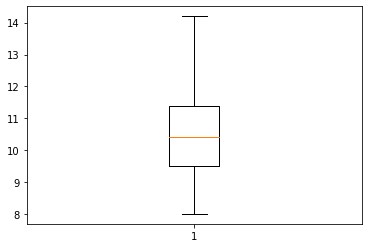

In [12]:
# Boxplot de la variable "alcohol" de white_wine
plt.boxplot(white_wine["alcohol"])

{'boxes': [<matplotlib.lines.Line2D at 0x7f9673d07390>],
 'caps': [<matplotlib.lines.Line2D at 0x7f9673d0e3d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9673d15410>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f9673d0ee90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f9673d07910>,
  <matplotlib.lines.Line2D at 0x7f9673d07e50>]}

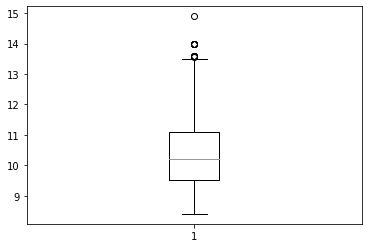

In [14]:
# Boxplot de la variable "alcohol" de red_wine
plt.boxplot(red_wine["alcohol"])

### Combinación de fuentes de información

In [15]:
# Añade una columna "type" a white_wine con valor constante 0
white_wine["type"] = 0

In [16]:
# Añade una columna "type" a red_wine con valor constante 1
red_wine["type"] = 1

In [17]:
# Combina ambos dataframes
wines = red_wine.append(white_wine, ignore_index=True)

### Correlaciones

In [18]:
# Calcula la matriz de correlaciones entre las variables
# Usa el método corr() de pandas
corr = wines.corr()

AttributeError: ignored

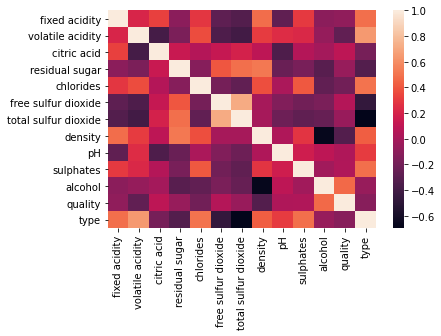

In [19]:
# Muestra un capa de calor de las correlaciones
# Usa la librería Seaborn de visualización
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.show()

En caso de detectar variables altamente correlacionadas entre sí, podría ser necesario aplicar alguna técnica de selección de varialbles o reducción de dimensionalidad (como PCA), con el fin de eliminar información redundante para el modelo, además de reducir el número de parámetros y, con ello, el coste computacional.

### Otras técnicas de calidad del dato
Junto a los anteriores pasos del proceso de calidad del dato, sería conveniente realizar otras comprobaciones y, en caso necesario, los ajustes pertinentes para lograr un estado de los datos óptimo. Recordemos que un buen proceso de calidad del dato es iterativo y, a grandes rasgos, se podría enfocar en aspectos como los siguientes:

![dataquality.PNG](attachment:dataquality.PNG)

Recordemos que, además, todo proceso de exploración y limpieza de datos debe apoyarse en visualizaciones gráficas.

### Particiones de entrenamiento, validación y test
Para poder realizar un buen ajuste del modelo, lo ideal es utilizar tres particiones de datos:
- Una para entrenarlo (*train set*)
- Otra para evaluarlo durante el entrenamiento (*validation set*)
- Una última partición para realizar una evaluación final, una vez concluido el entrenamiento (*test set*)

Para hacer la partición de train y test, podemos hacer uso de *train_test_split* de la librería Scikit Learn.

In [20]:
# Guarda las características (features) en una variable X
X = wines.loc[:, wines.columns != "type"]
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [23]:
# Guarda el target en una variable y
# Previamente, aplica un np.ravel() para aplanar los valores
y = np.ravel(wines["type"])
y

array([1, 1, 1, ..., 0, 0, 0])

In [24]:
# Crea una partición de train (70% de los datos) y test (30%)
# Fija una semilla de 42 para garantizar la repetibilidad de los resultados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Estandarización

La estandarización de un conjunto de datos suele ser un requisito común, ya que el ajuste puede complicarse si las características individuales no se encuentran distribuidas normalmente (distribución gaussiana con media 0 y varianza unitaria).

In [26]:
# Instancia el scaler y ajústalo en el set de entrenamiento
scaler = StandardScaler().fit(X_train)

In [27]:
# Escala el set de entrenamiento
X_train = scaler.transform(X_train)

In [28]:
# Escala el set de pruebas
X_test = scaler.transform(X_test)

## Definición de un modelo de red neuronal

### Tipos de capas en Keras

Las capas son los componentes básicos de las redes neuronales en Keras. Una instancia de Layer es invocable, al igual que una función:

`from tensorflow.keras import layers
layer = layers.Dense(32, activation='relu')
inputs = tf.random.uniform(shape=(10, 20))
outputs = layer(inputs)`

Sin embargo, a diferencia de una función, las capas mantienen un estado, ya que sus pesos se actualizan cuando la capa recibe datos durante el entrenamiento, almacenándose en *layer.weights*.

Las siguientes se pueden considerar las **capas fundamentales** de Keras:
- **Capa Dense**, que simplemente es la clásica capa neuronal completamente conectada (documentación disponible en https://keras.io/api/layers/core_layers/dense/).
- **Capa Conv1D**, que es una capa de convolución de 1D y que se usa, por ejemplo, para casos de convolución temporal (documentación disponible en https://keras.io/api/layers/convolution_layers/convolution1d/).
- **Capa Conv2D**, que es una capa de convolución de 2D y que se usa, por ejemplo, para casos de convolución espacial sobre imágenes (documentación disponible en https://keras.io/api/layers/convolution_layers/convolution2d/).
- **Capa Conv3D**, que es una capa de convolución de 3D y que se usa, por ejemplo, para casos de convolución espacial sobre volúmenes (documentación disponible en https://keras.io/api/layers/convolution_layers/convolution3d/).
- **Capa SimpleRNN**, que es una capa recurrente completamente conectada donde la salida debe retroalimentarse a la entrada (documentación disponible en https://keras.io/api/layers/recurrent_layers/simple_rnn/). 
- **Capa LSTM**, que es una capa de tipo LSTM (documentación disponible en https://keras.io/api/layers/recurrent_layers/lstm/).
- **Capa SimpleRNN**, que es una capa de tipo GRU (documentación disponible en https://keras.io/api/layers/recurrent_layers/gru/).

### Funciones de activación de cada capa
Cada capa debe tener asociada una función de activación, que se especifica mediante el argumento *activation* de la capa y que será la misma para todas las neuronas que compongan dicha capa. En Keras, se pueden utilizar, entre otras, las siguientes funciones de activación:

- ***relu function***
- ***sigmoid function***
- ***softmax function***
- ***softplus function***
- ***softsign function***
- ***tanh function***
- ***elu function***
- ***exponential function***

***Para más información acerca de las funciones de activación de keras, consultar: https://keras.io/api/layers/activations/***

### Inicialización de los pesos de una capa

Hay distintas técnicas de inicialización de pesos de una capa, y además los argumentos de palabras clave que se utilizan para pasar inicializadores a las capas dependen de la capa. Por lo general, son simplemente *kernel_initializer* y *bias_initializer*. En Keras, están disponibles las siguientes opciones de inicialización de pesos:
- **RandomNormal**
- **RandomUniform**
- **TruncatedNormal**
- **Zeros**
- **Ones**
- **GlorotNormal**
- **GlorotUniform**
- **HeNormal**
- **HeUniform**
- **Identity**
- **Orthogonal**
- **Constant**
- **VarianceScaling**

***Para más información acerca de las técnicas de inicialización de pesos de keras, consultar: https://keras.io/api/layers/initializers/***

### Ejemplo de definición de un modelo con varias capas en Keras
Utilizando el método *add()* de Keras, se puede definir un modelo de red neuronal de forma secuencial como se muestra a continuación:

`model = keras.Sequential(name="my_sequential")`

`model.add(layers.Dense(60, 
                        input_dim = 60,
                        activation="relu", 
                        kernel_initializer="glorot_uniform",
                        bias_initializer="zeros",
                        name="layer1"))`

En este caso, al modelo se le ha asignado el nombre "my_sequential" (útil para comparar varios modelos) y está compuesto únicamente por una capa con las siguientes características:
- Es de tipo denso (completamente conectada)
- Tiene 60 neuronas (*nodos* o, simplemente, *unidades*)
- Función de activación ReLu
- Inicialización de pesos mediante la técnica de Xavier Glorot *uniforme*
- Inicialización de biases en 0
- El nombre de la capa es "layer1"

***Para más información acerca de los modelos secuenciales de keras, consultar: https://keras.io/guides/sequential_model/***

A continuación, para seguir desarrollando el caso de uso de predicción del tipo de vino, utiliza el método *add()* de Keras y define un modelo secuencial de nombre "Model_1" con la siguiente estructura:
- 1 capa de tipo denso con 12 neuronas,función de activación ReLu, inicialización de pesos mediante la técnica de Xavier uniforme, inicialización de biases en 0 y nombre de la capa "Layer_1". Asegúrate de que esta capa esté preparada para recibir entradas con las dimensiones de los datos que se han cargado al principio del notebook. *Nota: haz uso del argumento input_shape*.
- 1 capa de tipo denso con 8 neuronas, función de activación ReLu, inicialización de pesos mediante la técnica de Xavier uniforme, inicialización de biases en 0 y nombre de la capa "Layer_2".
- 1 capa de salida de tipo denso con un número apropiado de neuronas y una función de activación también adecuada para la predicción que se desea obtener, inicialización de pesos mediante la técnica de Xavier uniforme, inicialización de biases en 0 y nombre de la capa "Layer_3".

In [33]:
# Calcula el input shape del modelo
input_shape = X_train.shape[1]
input_shape

12

In [40]:
model = Sequential(name="Model_1")

# Hidden
model.add(layers.Dense(11, 
                input_shape=(input_shape,), 
                activation="relu",
                kernel_initializer="glorot_uniform",
                bias_initializer="zeros",
                name="Layer_1"))

# Hidden
model.add(layers.Dense(8, 
                activation='relu',
                kernel_initializer="glorot_uniform",
                bias_initializer="zeros",
                name="Layer_2"))

# Output
model.add(layers.Dense(1, 
                activation='sigmoid',
                kernel_initializer="glorot_uniform",
                bias_initializer="zeros",
                name="Layer_3"))

In [41]:
# Muestra el summary del modelo
model.summary()

Model: "Model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer_1 (Dense)              (None, 11)                143       
_________________________________________________________________
Layer_2 (Dense)              (None, 8)                 96        
_________________________________________________________________
Layer_3 (Dense)              (None, 1)                 9         
Total params: 248
Trainable params: 248
Non-trainable params: 0
_________________________________________________________________


In [42]:
# Muestra la configuración del modelo
model.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 12),
    'dtype': 'float32',
    'name': 'Layer_1_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 12),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'Layer_1',
    'trainable': True,
    'units': 11,
    'use_bias': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer

In [43]:
# Muestra los pesos recién inicializados del modelo
model.get_weights()

[array([[ 0.19246322,  0.16402853, -0.10711709,  0.05809385,  0.3778252 ,
         -0.47740743,  0.12624729,  0.35477972,  0.4993567 ,  0.35606968,
          0.21272445],
        [ 0.03539062,  0.02353412,  0.30241567, -0.35177472, -0.02818733,
         -0.43838033, -0.5051423 , -0.1143375 , -0.13024583,  0.44128793,
         -0.45313948],
        [-0.3874684 ,  0.03781325,  0.08400965,  0.34598893, -0.43077144,
          0.48235047,  0.49283618,  0.47297794,  0.34523284, -0.3161452 ,
         -0.32270378],
        [ 0.05945259, -0.1805087 , -0.2595337 , -0.29432786,  0.11936516,
          0.3489464 ,  0.24400604,  0.07503486, -0.09964228, -0.08528742,
         -0.5057744 ],
        [-0.40509254, -0.4581355 , -0.28862482,  0.12249523, -0.11901397,
         -0.09327671, -0.21621093, -0.40840548,  0.30766237,  0.49121398,
         -0.21456856],
        [-0.47354832,  0.49723595,  0.38000393, -0.17738926,  0.05067593,
          0.31438243, -0.09002769,  0.31775576,  0.50691825,  0.3082478

## Compilación del modelo

Antes de entrenar un modelo con el método *fit()* de Keras, es necesario especificar una función de pérdida, un optimizador y, opcionalmente, algunas métricas para monitorear.

> Bloque con sangría



Para ello, se le pasan estos hiperparámetros al modelo como argumentos del método *compile()* de Keras:

`model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-3),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)`

***Para más información acerca del método compile() de Keras, consultar: https://keras.io/api/models/model_training_apis/***

### Tipos de funciones de pérdida
El propósito de las funciones de pérdida es calcular la cantidad que un modelo debe buscar minimizar durante el entrenamiento.

Las siguientes funciones de pérdida son de las más populares:
- **BinaryCrossentropy**: calcula la pérdida de entropía cruzada entre etiquetas verdaderas y etiquetas predichas, por lo que se utiliza aplicaciones de clasificación binaria (etiquetas 0 o 1).
- **CategoricalCrossentropy**: calcula la pérdida de entropía cruzada para dos o más clases de etiquetas. Espera que las etiquetas se proporcionen en una representación one_hot (es decir, de tipo *one hot encoding*). Esta codificación puede llevarse a cabo mediante el método get_dummies() de la librería pandas, mediante el OneHotEncoder() de Scikit Learn, de forma manual...

***Para más información acerca de las funciones de pérdida disponibles en Keras, consultar https://keras.io/api/losses/***

### Optimizadores

El método fundamental de optimización en IA es el de descenso de gradiente. Sin embargo, existen muchas variaciones que se han ideado con el fin de poner solución a los diversos problemas que suelen experimentar las redes neuronales (como el de los mínimos locales).

Algunos de los optimizadores disponibles en Keras son los siguientes:
- **SGD** (el clásico Stochastic Gradient Descent)
- **RMSprop**
- **Adam**
- **Adagrad**
- **Adadelta** 
- **Adamax**
- **Nadam**
- **Ftrl**

***Para más información acerca de los optimizadores disponibles en Keras, consultar https://keras.io/api/optimizers/*** 

### Métricas de monitorización
Una métrica es una función que se utiliza para juzgar el rendimiento del modelo.

Las funciones métricas son similares a las funciones de pérdida, excepto por el hecho de que los resultados de evaluación obtenidos por una métrica no se utilizan al entrenar el modelo, mientras que los de la pérdida sí. De todos modos, es posible utilizar cualquier función de pérdida como métrica.

***Para más información acerca de los optimizadores disponibles en Keras, consultar https://keras.io/api/metrics/*** 

In [44]:
# Compila el modelo anterior, utilizando pérdida de tipo binary_crossentropy, 
# optimizador tipo Adam y métrica de monitorización de tipo accuracy
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Ajuste del modelo

In [46]:
# Ajusta el modelo utilizando el set de entrenamiento
# Establece 20 epochs y un tamaño de lote de 1 sola muestra
# Para mostrar información durante el entrenamiento, establece la verbosidad en 1
# Guarda el historial de entrenamiento en una variable llamada history
history = model.fit(X_train, y_train,
                    epochs=20, 
                    batch_size=1, 
                    verbose=1)

Epoch 1/20
3724/3724 [==============================] - 6s 1ms/step - loss: 0.1011 - accuracy: 0.9689
Epoch 2/20
3724/3724 [==============================] - 5s 1ms/step - loss: 0.0322 - accuracy: 0.9946
Epoch 3/20
3724/3724 [==============================] - 5s 1ms/step - loss: 0.0260 - accuracy: 0.9952
Epoch 4/20
3724/3724 [==============================] - 5s 1ms/step - loss: 0.0231 - accuracy: 0.9960
Epoch 5/20
3724/3724 [==============================] - 5s 1ms/step - loss: 0.0196 - accuracy: 0.9962
Epoch 6/20
3724/3724 [==============================] - 5s 1ms/step - loss: 0.0180 - accuracy: 0.9965
Epoch 7/20
3724/3724 [==============================] - 6s 1ms/step - loss: 0.0173 - accuracy: 0.9968
Epoch 8/20
3724/3724 [==============================] - 5s 1ms/step - loss: 0.0145 - accuracy: 0.9970
Epoch 9/20
3724/3724 [==============================] - 5s 1ms/step - loss: 0.0150 - accuracy: 0.9968
Epoch 10/20
3724/3724 [==============================] - 5s 1ms/step - loss: 0.013

## Evaluación 

In [48]:
# Evalúa el modelo con el dataset de prueba
# Usa el método evaluate() de Keras
score = model.evaluate(X_test, y_test,verbose=1)

score

50/50 [==============================] - 0s 1ms/step - loss: 0.0278 - accuracy: 0.9950


[0.027846110984683037, 0.9949874877929688]

Edita esta celda de tipo Markdown y escribe algunas conclusiones acerca del resultado de la evaluación. ¿Qué significa cada uno de los dos valores que se muestran?

## Predicción

In [55]:
# Utiliza el modelo ajustado para realizar predicciones en el dataset de prueba
# Usa el método predict() de Keras y guarda las predicciones en una variable llamada probs
probs = model.predict(X_test)

# Muestra las predicciones
probs

array([[6.7669153e-04],
       [2.3251384e-02],
       [1.6950965e-03],
       ...,
       [1.0000000e+00],
       [4.5025349e-04],
       [1.6717911e-03]], dtype=float32)

In [57]:
# Ahora, utiliza el modelo ajustado para realizar predicciones en el dataset de prueba
# Para ello, ejecuta el código de esta misma celda:
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Muestra las predicciones
y_pred

array([0, 0, 0, ..., 0, 0, 0])

Edita esta celda de tipo Markdown y añade algunas conclusiones acerca de las dos predicciones realizadas en las celdas anteriores. ¿Qué diferencia hay entre ambas? ¿A qué se refiere cada una de ellas?

## Ampliaciones

### Primer experimento

Tras la generación del modelo de clasificación binaria anterior, realiza ahora otro experimento con las siguientes variaciones:

- Define y entrena un nuevo modelo utilizando 3 capas ocultas. Añade más de 20 neuronas en cada una de las capas ocultas.
- Asigna "Model_2" como nombre de este nuevo modelo.
- Evalúa el modelo utilizando el dataset de prueba.

In [60]:
model2 = Sequential(name="Model_2")

# Input
model2.add(layers.Dense(11, 
                input_shape=(input_shape,), 
                activation="relu",
                kernel_initializer="glorot_uniform",
                bias_initializer="zeros",
                name="Layer_1"))

# Hidden 1
model2.add(layers.Dense(30, 
                activation='relu',
                kernel_initializer="glorot_uniform",
                bias_initializer="zeros",
                name="Layer_2"))

# Hidden 2
model2.add(layers.Dense(40, 
                activation='relu',
                kernel_initializer="glorot_uniform",
                bias_initializer="zeros",
                name="Layer_3"))

# Hidden 3
model2.add(layers.Dense(50, 
                activation='relu',
                kernel_initializer="glorot_uniform",
                bias_initializer="zeros",
                name="Layer_4"))

# Output
model2.add(layers.Dense(1, 
                activation='sigmoid',
                kernel_initializer="glorot_uniform",
                bias_initializer="zeros",
                name="Layer_5"))

In [61]:
model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [62]:
history2 = model2.fit(X_train, y_train,
                    epochs=20, 
                    batch_size=1, 
                    verbose=1)

Epoch 1/20
3724/3724 [==============================] - 7s 2ms/step - loss: 0.0828 - accuracy: 0.9721
Epoch 2/20
3724/3724 [==============================] - 7s 2ms/step - loss: 0.0398 - accuracy: 0.9895
Epoch 3/20
3724/3724 [==============================] - 7s 2ms/step - loss: 0.0287 - accuracy: 0.9944
Epoch 4/20
3724/3724 [==============================] - 7s 2ms/step - loss: 0.0258 - accuracy: 0.9952
Epoch 5/20
3724/3724 [==============================] - 6s 2ms/step - loss: 0.0215 - accuracy: 0.9962
Epoch 6/20
3724/3724 [==============================] - 7s 2ms/step - loss: 0.0196 - accuracy: 0.9965
Epoch 7/20
3724/3724 [==============================] - 7s 2ms/step - loss: 0.0169 - accuracy: 0.9968
Epoch 8/20
3724/3724 [==============================] - 6s 2ms/step - loss: 0.0224 - accuracy: 0.9965
Epoch 9/20
3724/3724 [==============================] - 6s 2ms/step - loss: 0.0181 - accuracy: 0.9957
Epoch 10/20
3724/3724 [==============================] - 7s 2ms/step - loss: 0.015

In [63]:
model2.evaluate(X_test, y_test,verbose=1)

50/50 [==============================] - 0s 1ms/step - loss: 0.0546 - accuracy: 0.9944


[0.05455427244305611, 0.9943609237670898]

Edita esta celda de tipo Markdown y escribe algunas conclusiones comparando el rendimiento de los dos modelos entrenados hasta este momento. ¿Ha mejorado sustancialmente el rendimiento del modelo al hacer más compleja la arquitectura? ¿Ha merecido la pena?

### Segundo experimento

Hasta ahora, no hemos controlado el verdadero rendimiento del modelo durante el entrenamiento, ya que no hemos utilizado ningún set de validación ni ninguna técnica de paralización inteligente del ajuste para prevenir el overfitting. 

Por suerte, nuestros dos modelos han respondido bien ante los datos de prueba una vez entrenados, pero podría haberse producido un gran sobreajuste al aumentar tanto la complejidad del modelo. En general, existen dos técnicas básicas muy efectivas para controlar este riesgo:
- Regularización, que puede aplicarse de varias maneras. En Keras, los regularizadores se aplican capa a capa.
- Early stopping, que monitorea el rendimiento del modelo durante el entrenamiento al realizar una validación en un subconjunto de validación a medida que se avanza en el ajuste. Cuando se detecta que el rendimiento del modelo empieza a empeorar en el dataset de validación y, en cambio, sigue aumentando en el de entrenamiento, se finaliza automáticamente el ajuste. De esta manera, se evita que empeore el overfitting que estaba empezando a producirse.

Ejemplo de aplicación de regularización en una capa:

`layers.Dense(
    units=64,
    kernel_regularizer= "l1_l2",
    bias_regularizer= "l2",
    activity_regularizer= "l2"
)`

Donde:
- kernel_regularizer aplica una penalización en el kernel de la capa
- bias_regularizer aplica una penalización en el sesgo de la capa
- activity_regularizer aplica una penalización en la salida de la capa

Por otro lado, a continuación se muestra un ejemplo de aplicación de early stopping durante el entrenamiento:

`callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)`

`# Este callback finalizará automáticamente el entrenamiento cuando no haya mejora en la pérdida durante 3 epochs consecutivas`

`model = tf.keras.models.Sequential([tf.keras.layers.Dense(10)])`

`model.compile(tf.keras.optimizers.SGD(), loss='mse')`

`history = model.fit(np.arange(100).reshape(5, 20), np.zeros(5),
                     epochs=10, batch_size=1, callbacks=[callback],
                     verbose=0)`

***Para más información acerca de los regularizadores disponibles en Keras, consultar https://keras.io/api/layers/regularizers/*** 

***Para más información acerca de los optimizadores disponibles en Keras, consultar https://keras.io/api/callbacks/early_stopping/***  


Como segundo experimento, define, entrena y evalúa el mismo modelo utilizado en el experimento 1, aplicando:
- Regularización en el kernel de la capa de tipo L1 (Lasso) 
- Early stopping con paciencia máxima para 3 epochs

### Tercer experimento
Realiza ahora las siguientes variaciones:
- Establece la variable "quality" como el nuevo target y utiliza el resto de variables (incluida "type") como features. Ten en cuenta que, de esta forma, el problema pasa a ser de clasificación multiclase, así que haz los cambios necesarios en la arquitectura y compilación del modelo.
- Nombra al modelo "Model_3".
- Experimenta con algún nuevo optimizador.
- Inicializa los pesos de forma adecuada.
- Añade algún tipo de regularización.
- Entrena y evalúa este nuevo modelo utilizando el dataset de prueba. 
- Aplica early stopping.
